# Vital Statistics: Charts Combined from all sports leagues

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Read in DataFrames from each league

In [2]:
mlb_merged = pd.read_csv('./data/mlb_merged.csv')
nfl_merged = pd.read_csv('./data/nfl_merged.csv')
nba_merged = pd.read_csv('./data/nba_merged.csv')
nhl_merged = pd.read_csv('./data/nhl_merged.csv')

### Average Age of Death of Players in a Given Year

In [3]:
mlb_avg_death_age = mlb_merged.groupby('death year').mean()['approx age']
nfl_avg_death_age = nfl_merged.groupby('death year').mean()['age']
nba_avg_death_age = nba_merged.groupby('death year').mean()['age']
nhl_avg_death_age = nhl_merged.groupby('death year').mean()['age']

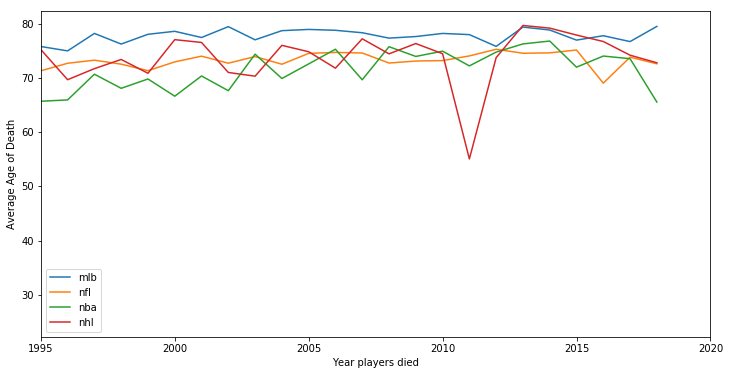

In [4]:
plt.figure(figsize=(12,6))

plt.plot(mlb_avg_death_age, label='mlb')
plt.plot(nfl_avg_death_age, label='nfl')
plt.plot(nba_avg_death_age, label='nba')
plt.plot(nhl_avg_death_age, label='nhl')
plt.xlim(1995,2020)
plt.xticks()
plt.xlabel('Year players died')
plt.ylabel('Average Age of Death')
plt.legend()

In [5]:
mlb_birth_count = mlb_merged.groupby('birth year').count()
nfl_birth_count = nfl_merged.groupby('birth year').count()
nba_birth_count = nba_merged.groupby('birth year').count()
nhl_birth_count = nhl_merged.groupby('birth year').count()

### Percentage of players from each league who are deceased

In [6]:
mlb_death_pct = mlb_birth_count['death year'] / mlb_birth_count['link']
nfl_death_pct = nfl_birth_count['death year'] / nfl_birth_count['link']
nba_death_pct = nba_birth_count['death year'] / nba_birth_count['link']
nhl_death_pct = nhl_birth_count['death year'] / nhl_birth_count['link']

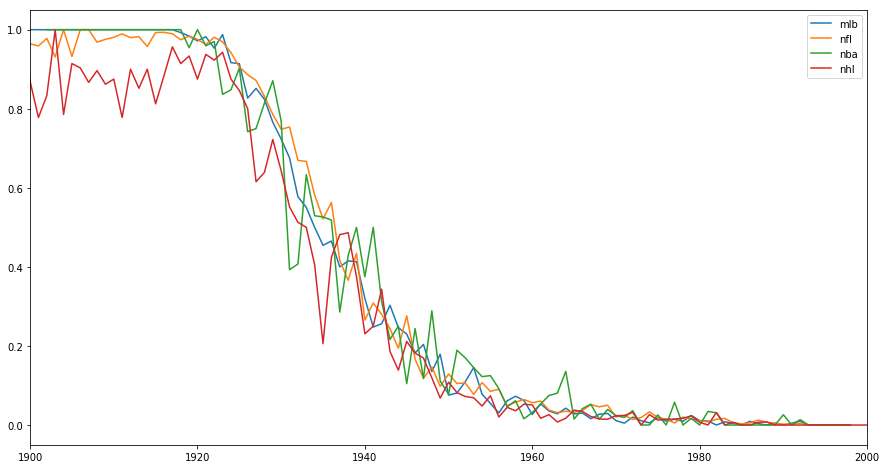

In [7]:
plt.figure(figsize=(15,8))

plt.plot(mlb_death_pct, label='mlb')
plt.plot(nfl_death_pct, label='nfl')
plt.plot(nba_death_pct, label='nba')
plt.plot(nhl_death_pct, label='nhl')
plt.xlim(1900,2000)
plt.legend()

In [16]:
nhl_merged['experience'] = nhl_merged['last year'] - nhl_merged['first year'] + 1

### Experience versus age at death for players who died since 2000

In [17]:
mlb_died_since_2000 = mlb_merged[mlb_merged['death year'] > 1999]
nfl_died_since_2000 = nfl_merged[nfl_merged['death year'] > 1999]
nba_died_since_2000 = nba_merged[nba_merged['death year'] > 1999]
nhl_died_since_2000 = nhl_merged[nhl_merged['death year'] > 1999]

In [22]:
nba_agg = pd.DataFrame([nba_died_since_2000.groupby('experience').count()['link'],
                       nba_died_since_2000.groupby('experience').mean()['age']]).T

In [23]:
nba_agg

,link,age
experience,,
1,208.0,76.730769
2,84.0,73.642857
3,51.0,73.843137
4,41.0,72.243902
5,40.0,71.350000
6,20.0,69.750000
7,16.0,67.187500
8,19.0,64.421053
9,18.0,72.055556


In [20]:
nhl_agg = pd.DataFrame([nhl_died_since_2000.groupby('experience').count()['link'],
                       nhl_died_since_2000.groupby('experience').mean()['age']]).T

In [21]:
nhl_agg

,link,age
experience,,
1,139.0,76.294964
2,46.0,73.782609
3,39.0,69.461538
4,32.0,71.218750
5,24.0,75.250000
6,24.0,67.333333
7,19.0,73.368421
8,19.0,73.368421
9,29.0,76.896552


In [24]:
mlb_agg = pd.DataFrame([mlb_died_since_2000.groupby('experience').count()['link'],
                       mlb_died_since_2000.groupby('experience').mean()['approx age']]).T
nfl_agg = pd.DataFrame([nfl_died_since_2000.groupby('experience').count()['link'],
                       nfl_died_since_2000.groupby('experience').mean()['age']]).T

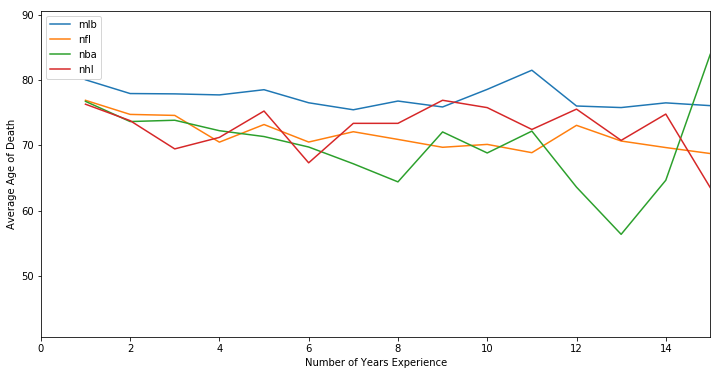

In [29]:
plt.figure(figsize=(12,6))

plt.plot(mlb_agg['approx age'], label='mlb')
plt.plot(nfl_agg['age'], label='nfl')
plt.plot(nba_agg['age'], label='nba')
plt.plot(nhl_agg['age'], label='nhl')
plt.xlim(0,15)
plt.xlabel('Number of Years Experience')
plt.ylabel('Average Age of Death')
plt.legend()

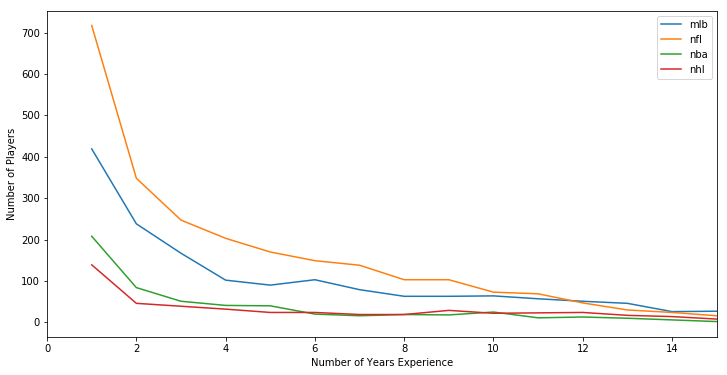

In [30]:
plt.figure(figsize=(12,6))

plt.plot(mlb_agg['link'], label='mlb')
plt.plot(nfl_agg['link'], label='nfl')
plt.plot(nba_agg['link'], label='nba')
plt.plot(nhl_agg['link'], label='nhl')
plt.xlim(0,15)
plt.xlabel('Number of Years Experience')
plt.ylabel('Number of Players')
plt.legend()